# Data filtering
Data filtering from behavior interrupting acuity tests (following the stripes):
1. Rearing
2. Scratching
3. Moving around

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

dfPos = {}
dfOri = {}
df = {}
index = {'X', 'Y', 'Z'}

fnameClean = [
    'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU_clean.h5',
    'VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC_clean.h5',
    'VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC_clean.h5', ]

path = '../datasets/'
keyPass = 'Position'

def check_nan(DataFrame, key):
    for i, x in enumerate(DataFrame[key]):
        if math.isnan(x):
            print(i, x)

for i, x in enumerate(fnameClean):
    dfPos[i] = pd.read_hdf(path+fnameClean[i], 'Position')
    dfOri[i] = pd.read_hdf(path+fnameClean[i], 'Orientation')    
    
    #df[i] = pd.merge(df_pos[i], df_ori[i], on='Frame') # merge before or after filtering ## to be decided


## Rearing removal
Removal based on Y axis postion limit - low pass filter

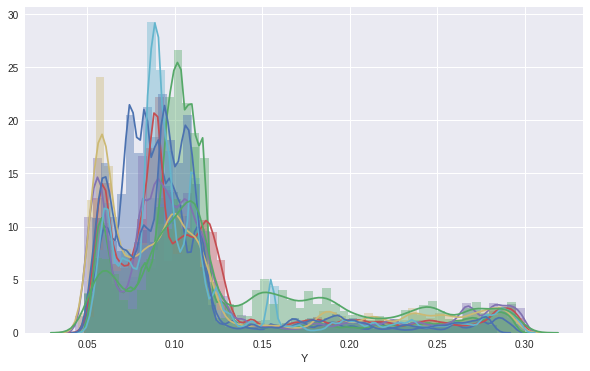

In [2]:
# data visutalization of all datasets before low pass filtering
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfPos[i].Y)

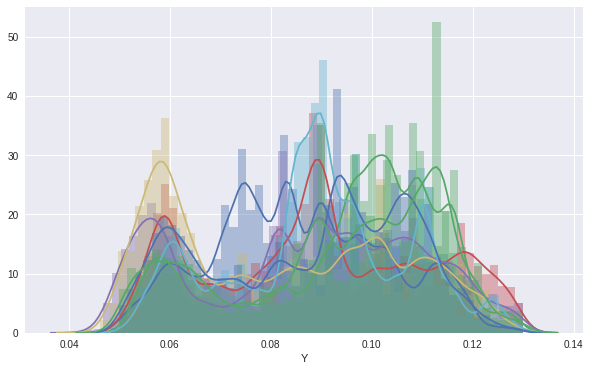

In [3]:
# removal of rearing positions
filter_limit = 0.13 ## to be decided

for i, x in enumerate(fnameClean):
    dfPos[i] = dfPos[i][dfPos[i]['Y'] < filter_limit]
    
# post filter vis
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfPos[i].Y)


## Scratching and cleaning removal
Removal based on Y axis orientation limit - band pass filter

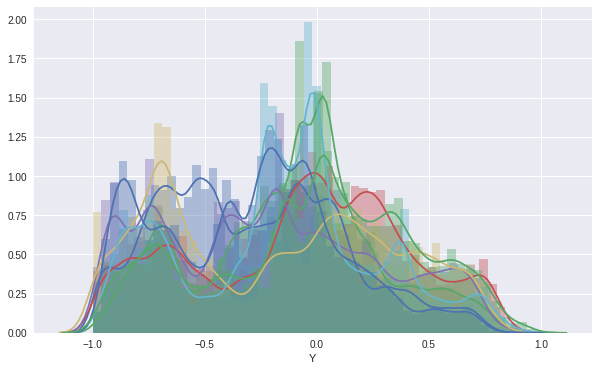

In [4]:
# data visutalization of all datasets before lband pass filtering
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfOri[i].Y)

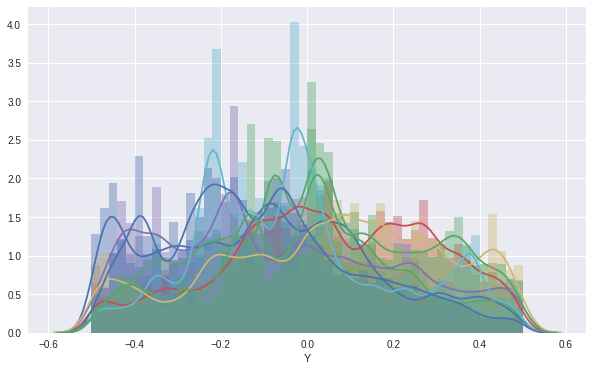

In [5]:
# removal of rearing positions
filter_limit = 0.5   ## to be decided

for i, x in enumerate(fnameClean):
    dfOri[i] = dfOri[i][dfOri[i]['Y'] < filter_limit]
    dfOri[i] = dfOri[i][dfOri[i]['Y'] >-filter_limit]
    
# post filter vis
fig = plt.figure(figsize=(10,6))
for i, x in enumerate(fnameClean):
    sns.distplot(dfOri[i].Y)

## Rapid movement removal
Removal based on speed of changes in the position of the animal - low pass filter of diagonal velocity.

To be decided: based on which/both data changes speed remove it

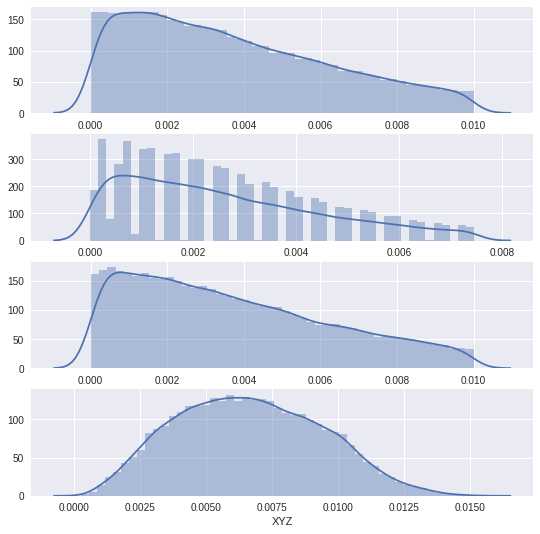

In [6]:
# Visualization for one experiment
# extraction of speed of positon changes
#dfV    = dfPos[1].set_index('Frame').diff().dropna()
dfV =  dfPos[1].diff()
dfV.Frame = dfPos[1].Frame.dropna()

# calculating velocity in all axes
dfV['X'] = dfV.apply(lambda row: np.absolute(row.X) / row.Time, axis=1)
dfV['Y'] = dfV.apply(lambda row: np.absolute(row.Y) / row.Time, axis=1)
dfV['Z'] = dfV.apply(lambda row: np.absolute(row.Z) / row.Time, axis=1)
dfV['XYZ'] = dfV.apply(lambda row: np.sqrt(row.X**2 + row.Y**2 + row.Z**2), axis=1) # diagonal velocity

filter_limit = 0.01
for k in index:
    dfV = dfV[dfV[k] < filter_limit]

dfV = dfV[dfV[k] < 0.0075]
    
# velocity distribution in all axes
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.distplot(dfV.X, ax=ax1)
sns.distplot(dfV.Y, ax=ax2)
sns.distplot(dfV.Z, ax=ax3)
sns.distplot(dfV.XYZ, ax=ax4)

In [7]:
dfV = {}

for i, x in enumerate(fnameClean):
    # extraction of positon and time changes
    dfV[i] = dfPos[i].diff()
    dfV[i].Frame = dfPos[i].Frame
    dfV[i].dropna(inplace=True)

    # calculating velocity in all axes
    dfV[i]['X']   = dfV[i].apply(lambda row: np.absolute(row.X) / row.Time, axis=1)
    dfV[i]['Y']   = dfV[i].apply(lambda row: np.absolute(row.Y) / row.Time, axis=1)
    dfV[i]['Z']   = dfV[i].apply(lambda row: np.absolute(row.Z) / row.Time, axis=1)
    dfV[i]['XYZ'] = dfV[i].apply(lambda row: np.sqrt(row.X**2 + row.Y**2 + row.Z**2), axis=1) # diagonal velocity

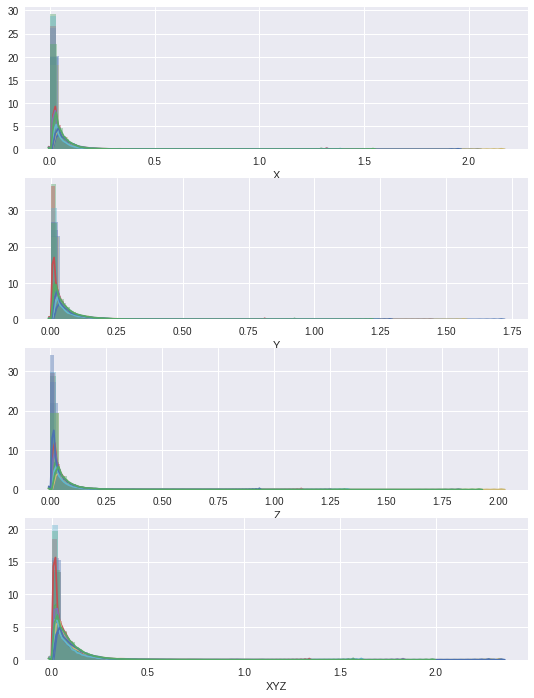

In [8]:
# pre-filtered distribution of velocity
fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)
#print(dfPos[0])
#print(dfV[0])

for i, x in enumerate(fnameClean):
    #print(dfV[i])
    sns.distplot(dfV[i].X  , ax=ax1)
    sns.distplot(dfV[i].Y  , ax=ax2)
    sns.distplot(dfV[i].Z  , ax=ax3)
    sns.distplot(dfV[i].XYZ, ax=ax4)

In [9]:
filter_limit = 0.02  ## to be decided
filter_xyz = 0.02 ## to be decided

for i, x in enumerate(fnameClean):
    dfV[i] = dfV[i][dfV[i]['XYZ'] < filter_xyz]
    for k in index:
        dfV[i] = dfV[i][dfV[i][k] < filter_limit]
    

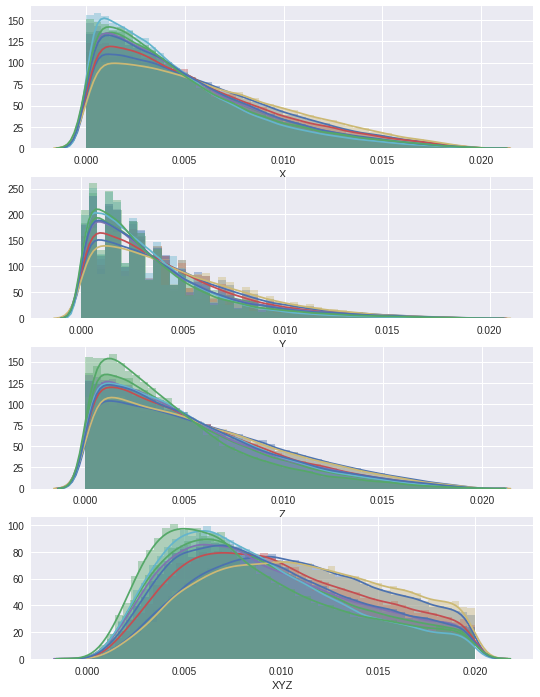

In [10]:
# filtered distribution of velocity
fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

for i, x in enumerate(fnameClean):
    sns.distplot(dfV[i].X  , ax=ax1)
    sns.distplot(dfV[i].Y  , ax=ax2)
    sns.distplot(dfV[i].Z  , ax=ax3)
    sns.distplot(dfV[i].XYZ, ax=ax4)

## Merging the datasets
Datasets merged - extraction of only good experiments frames.
After deleting invalid frames of events - merging and visutalization of final data distributions

In [20]:
for i, x in enumerate(fnameClean):
    #dropping not needed columns form dfV
    #dfV[i].drop({'X','Y','Z','Time'}, axis=1, inplace=True)
    
    #merging based on Frames allignment
    df[i] = pd.merge( pd.merge(dfPos[i], dfOri[i], on='Frame', suffixes=('_Pos', '_Ori')), dfV[i], on='Frame')
        
print(df[0])
    

        Frame     Time_Pos     X_Pos     Y_Pos     Z_Pos     Time_Ori  \
0         101     0.420833 -0.065238  0.098807 -0.054520     0.420833   
1         161     0.670833 -0.067942  0.114285 -0.052772     0.670833   
2         162     0.675000 -0.067899  0.114326 -0.052736     0.675000   
3         165     0.687500 -0.067739  0.114334 -0.052505     0.687500   
4         998     4.158334 -0.072900  0.129243 -0.015634     4.158334   
5        1206     5.025000 -0.045554  0.089349  0.055282     5.025000   
6        1207     5.029167 -0.045580  0.089422  0.055309     5.029167   
7        1208     5.033334 -0.045564  0.089476  0.055330     5.033334   
8        1209     5.037500 -0.045572  0.089520  0.055344     5.037500   
9        1210     5.041667 -0.045583  0.089552  0.055363     5.041667   
10       1211     5.045834 -0.045574  0.089582  0.055350     5.045834   
11       1212     5.050000 -0.045597  0.089628  0.055400     5.050000   
12       1213     5.054167 -0.045584  0.089648  0.0

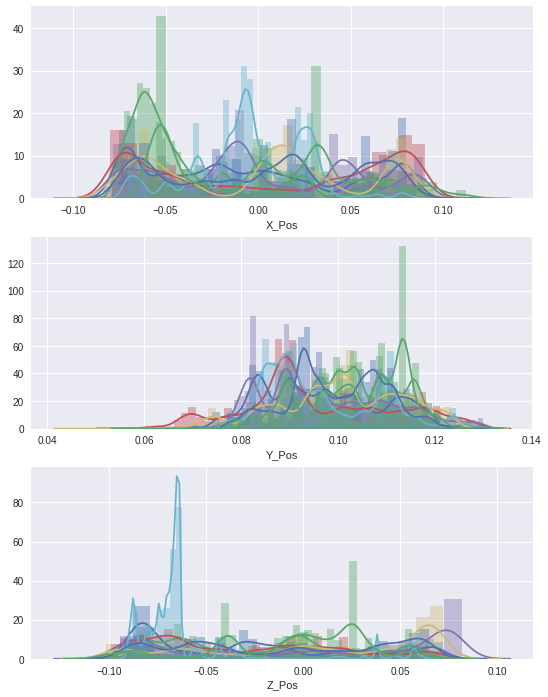

In [21]:
# Univariat positions X,Y,Z of all experiments after data removal
fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
for i, x in enumerate(fnameClean):
    sns.distplot(df[i].X_Pos, ax=ax1)
    sns.distplot(df[i].Y_Pos, ax=ax2)
    sns.distplot(df[i].Z_Pos, ax=ax3)

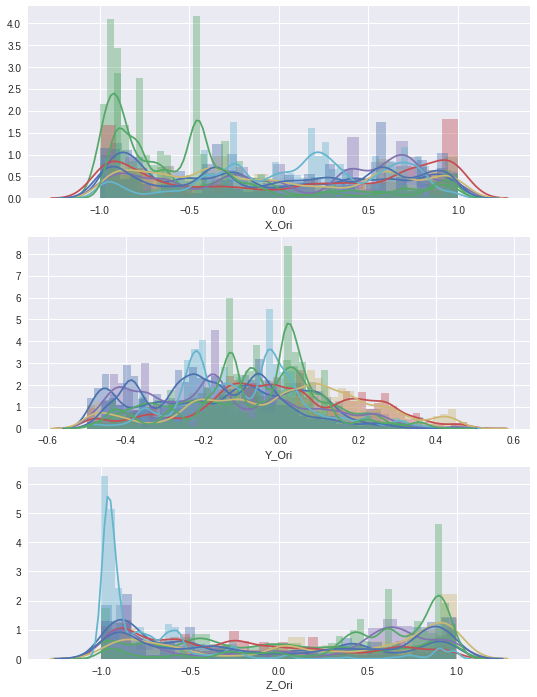

In [23]:
# Univariat orientation X,Y,Z of all experiments
fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
    
for i, x in enumerate(fnameClean):
    sns.distplot(df[i].X_Ori, ax=ax1)
    sns.distplot(df[i].Y_Ori, ax=ax2)
    sns.distplot(df[i].Z_Ori, ax=ax3)

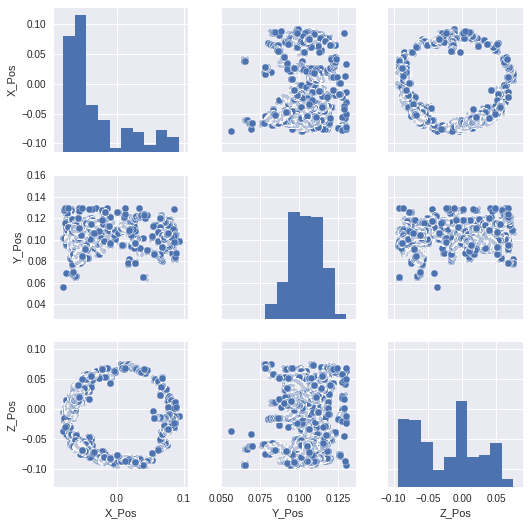

In [26]:
# bivariate example distributions
fig = plt.figure(figsize=(12,12))
sns.pairplot(df[1], vars=['X_Pos', 'Y_Pos', 'Z_Pos'])

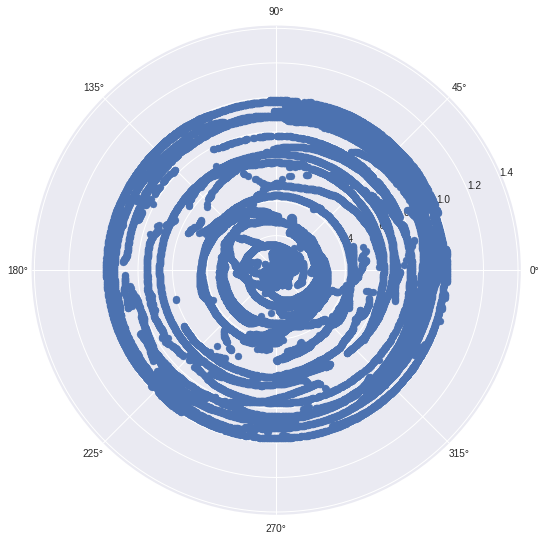

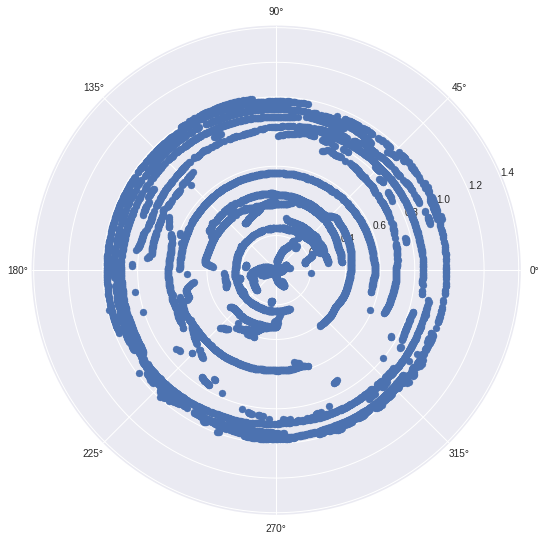

In [37]:
#rotation based on flattened orientation vector

#Rotation of the head for single stimulation event
start_index = 0 
stop_index  = 100000
    

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar = 'true')
c = ax.scatter(df[1].Time_Ori[start_index:stop_index], df[1].Z_Ori[start_index:stop_index])

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar = 'true')
c = ax.scatter(df[1].Time_Ori[start_index:stop_index], df[1].X_Ori[start_index:stop_index])


In [ ]:
#Add comparison with non-filter data-check for all experiments + fix times in merged data